# Estimar una función de densidad de probabilidad mediante el algoritmo  Metropolis

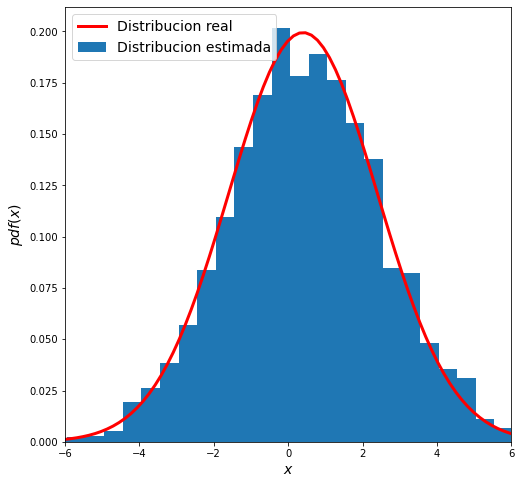

In [9]:
#Importar módulo numpy para introducir la función randint la cual
#se encuentra dentro de la librería random
import numpy as np

#importar módulo matplotlib.pyplot para realizar gráficos
#se grafican histogramas y curvas
import matplotlib.pyplot as plt

#importar módulo scipy.stats para funciones de distribución estadísticas
import scipy.stats as stats

PasosMC=10000

#Creación de la funcion metropolis 
def metropolis(func, steps=PasosMC):

    muestras = np.zeros(steps)

    #Valor inicial de una distribucion uniforme entre 0 y 1 
    x_viejo = np.random.random()

    #Probabilidad del valor inicial
    prob_viejo = func.pdf(x_viejo)
    
    for i in range(steps):
        #Nuevo valor de una distribución uniforme entre -10 y 10
        x_nuevo = np.random.uniform(-10,10)

        #Probabilidad del nuevo valor
        prob_nuevo = func.pdf(x_nuevo)

        #Probabilidad de aceptacion o transicion
        aceptacion = prob_nuevo / prob_viejo

        #Toma de decision usando el muestreo por importancia
        if aceptacion >= np.random.random():
            muestras[i] = x_nuevo
            x_viejo = x_nuevo
            prob_viejo = prob_nuevo
        else:
            muestras[i] = x_viejo
    
    return muestras

# distribucion normal
func = stats.norm(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)

#En esta version de python, los objetos tipo rectangulo no tienen atributos "normed". Toca cambiarlo por "density"
plt.hist(samples, bins=30, density=True, label='Distribucion estimada')
plt.plot(x, y, 'r-', lw=3, label='Distribucion real')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()
